## Fairness metrics to evaluate the model

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

# Evaluate the two datasets with 4000 entries

In [2]:
df_prediction_1 = pd.read_csv('../results/candidate_data_4000_res_1.csv')
df_prediction_2 = pd.read_csv('../results/candidate_data_4000_res_2.csv')

In [3]:
# Statistical Parity Difference
def spd(sensitive_attribute, dataset, predicted_labels, majority_class, minority_class):
    """
    Calculate the Statistical Parity Difference (SPD) between majority and minority classes based on predicted labels.

    Parameters:
    - sensitive_attribute (str): Name of the column representing the sensitive attribute.
    - dataset (pd.DataFrame): The dataset containing the sensitive attribute and true outcome variable.
    - predicted_labels (pd.Series): Predicted labels for the outcome variable.
    - majority_class: Value representing the majority class in the sensitive attribute.
    - minority_class: Value representing the minority class in the sensitive attribute.

    Returns:
    - spd (float): Statistical Parity Difference between majority and minority classes.
    """
    predicted_labels = pd.to_numeric(predicted_labels)
    predicted_labels_series = pd.Series(predicted_labels, index=dataset.index)
    majority = dataset[dataset[sensitive_attribute] == majority_class]
    minority = dataset[dataset[sensitive_attribute] == minority_class]

    p_majority = predicted_labels_series[majority.index].mean()
    p_minority = predicted_labels_series[minority.index].mean()

    spd_val =  p_minority - p_majority
    return spd_val

In [4]:
# Disparate Impact
def di(sensitive_attribute, dataset, predicted_labels, majority_class, minority_class):
    """
    Calculate the Disparate Impact (DI) between majority and minority classes based on predicted labels.

    Parameters:
    - sensitive_attribute (str): Name of the column representing the sensitive attribute.
    - dataset (pd.DataFrame): The dataset containing the sensitive attribute and true outcome variable.
    - predicted_labels (pd.Series): Predicted labels for the outcome variable.
    - majority_class: Value representing the majority class in the sensitive attribute.
    - minority_class: Value representing the minority class in the sensitive attribute.

    Returns:
    - di (float): Disparate Impact between majority and minority classes.
    """
    predicted_labels = pd.to_numeric(predicted_labels)
    predicted_labels_series = pd.Series(predicted_labels, index=dataset.index)
    majority = dataset[dataset[sensitive_attribute] == majority_class]
    minority = dataset[dataset[sensitive_attribute] == minority_class]

    p_majority = predicted_labels_series[majority.index].mean()
    p_minority = predicted_labels_series[minority.index].mean()

    di_val = p_minority / p_majority
    return di_val

In [5]:
# spd for current dataset
"""
Range: The range of SPD is [-1, 1]. 
A value of -1 indicates that all favorable outcomes are allocated to the majority group, 
whereas a value of 1 indicates that all favorable outcomes are allocated to the minority group. 
Perfect Fairness: A value of 0 indicates perfect fairness, 
meaning the probability of receiving a favorable outcome is equal for both the majority and minority groups.
"""

dfs_spd = {'df_prediction_1': df_prediction_1, 'df_prediction_2': df_prediction_2}

for name, df in dfs_spd.items():
    res = spd("Gender", df, df["Interview prediction"], "M", "F")
    print(f"Statistical Parity Difference (SPD) of {name} is {res}")

Statistical Parity Difference (SPD) of df_prediction_1 is -0.15909978216600637
Statistical Parity Difference (SPD) of df_prediction_2 is -0.15439816149883986


In [6]:
# di for current dataset
"""
Range: DI is a ratio, so its range is [0, ∞). 
A value of 0 indicates extreme bias against the minority group, 
and a very high value indicates extreme bias against the majority group. 
Perfect Fairness: A DI of 1 (or close to 1) represents perfect fairness, 
suggesting that the probability of receiving a favorable outcome are equal for both groups.
"""

dfs_di = {'df_prediction_1': df_prediction_1, 'df_prediction_2': df_prediction_2}

for name, df in dfs_di.items():
    res = di("Gender", df, df["Interview prediction"], "M", "F")
    print(f"Statistical Parity Difference (SPD) of {name} is {res}")
    


Statistical Parity Difference (SPD) of df_prediction_1 is 0.5826787459851975
Statistical Parity Difference (SPD) of df_prediction_2 is 0.5842884531538365


In [7]:
# RM (Reproducibility Metric)
resume_score_1 = df_prediction_1['Resume score']
resume_score_2 =df_prediction_2['Resume score']

differences = abs(df_prediction_1['Resume score'] - df_prediction_2['Resume score'])
total_difference = differences.sum()
rm = total_difference / len(df_prediction_1)
print(f"rm score is {rm}")
print(f"This means the average resume score difference for the same candidate in two runs is {rm}")

rm score is 3.35412
This means the average resume score difference for the same candidate in two runs is 3.35412


In [8]:
# mean and standard deviation
mean_score_1 = resume_score_1.mean()
std_score_1 = resume_score_1.std()

mean_score_2 = resume_score_2.mean()
std_score_2 = resume_score_2.std()

# Print the results
print(f"Mean of 'Resume score' in df_prediction_1: {mean_score_1:.2f}")
print(f"Standard Deviation of 'Resume score' in df_prediction_1: {std_score_1:.2f}")
print(f"Mean of 'Resume score' in df_prediction_2: {mean_score_2:.2f}")
print(f"Standard Deviation of 'Resume score' in df_prediction_2: {std_score_2:.2f}")

Mean of 'Resume score' in df_prediction_1: 5.06
Standard Deviation of 'Resume score' in df_prediction_1: 2.90
Mean of 'Resume score' in df_prediction_2: 5.07
Standard Deviation of 'Resume score' in df_prediction_2: 2.90


In [9]:
# confidence interval
def calculate_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    n = len(data)
    interval = sem * stats.t.ppf((1 + confidence) / 2., n-1)  # T-distribution multiplier for 95% CI
    return (mean - interval, mean + interval)

# Calculate the confidence interval for 'Resume score' in both datasets
ci_score_1 = calculate_confidence_interval(resume_score_1)
ci_score_2 = calculate_confidence_interval(resume_score_2)

print(f"95% Confidence Interval for 'Resume score' in df_prediction_1: {ci_score_1[0]:.2f} to {ci_score_1[1]:.2f}")
print(f"95% Confidence Interval for 'Resume score' in df_prediction_2: {ci_score_2[0]:.2f} to {ci_score_2[1]:.2f}")

95% Confidence Interval for 'Resume score' in df_prediction_1: 4.97 to 5.15
95% Confidence Interval for 'Resume score' in df_prediction_2: 4.98 to 5.16


In [10]:
is_interview_1 = df_prediction_1['Interview prediction']
is_interview_2 = df_prediction_2['Interview prediction']

interview_getting_rate = (sum(is_interview_1) + sum(is_interview_2))/(2*len(is_interview_1))

print("The rate of getting an interview of Bold Bank is:",interview_getting_rate)

The rate of getting an interview of Bold Bank is: 0.19925


## Create labels based on an assumption that candidates with resume score over 8 could get an interview

Accuracy of df_prediction_1: 0.68


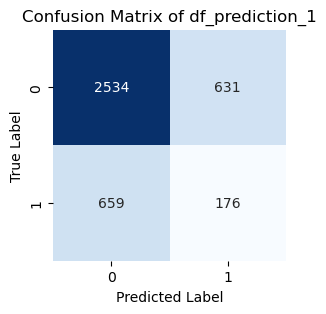

--------------------------------------------------
Accuracy of df_prediction_2: 0.67


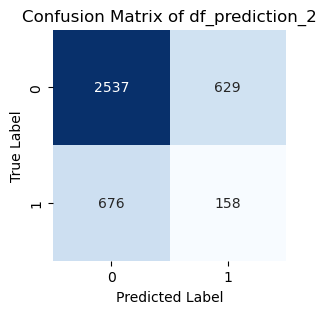

--------------------------------------------------


In [11]:
"""
Since the interview getting rate is ~20%, 
we assume that candidates with resume score over 8 could get an interview
"""

df_prediction_1['label'] = np.where(df_prediction_1['Resume score'] >= 8, 1, 0)
df_prediction_2['label'] = np.where(df_prediction_2['Resume score'] >= 8, 1, 0)


dfs = {'df_prediction_1': df_prediction_1, 'df_prediction_2': df_prediction_2}

for name, df in dfs.items():
    true_labels = df['label']  # Assuming 'label' column is your true labels
    predicted_labels = df['Interview prediction']  # Prediction results
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)

    print(f"Accuracy of {name}: {accuracy:.2f}")
    
    
    # Plotting the confusion matrix
    plt.figure(figsize=(3, 3))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix of {name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    print("-" * 50)

In [12]:
# Equal Opportunity Difference (EOD)
def eod(sensitive_attribute, predictions, dataset, true_labels, majority_class, minority_class):
    """
    Calculate the Equal Opportunity Difference (EOD) measure.

    Parameters:
    - sensitive_attribute: The column name of the sensitive attribute in the dataset.
    - predictions: Predictions made by the model.
    - dataset: The dataset containing the sensitive attribute and the outcome variable.
    - outcome_variable: The column name of the outcome variable in the dataset.
    - majority_class: The majority class label.
    - minority_class: The minority class label.

    Returns:
    - eod_value: The Equal Opportunity Difference measure.
    """
    # TODO: Compute the eod value
    predictions_series = pd.Series(predictions, index=dataset.index)
    positive_instances = dataset[true_labels == 1]

    # Use .loc to align with the DataFrame's index
    majority = positive_instances.loc[dataset[sensitive_attribute] == majority_class]
    minority = positive_instances.loc[dataset[sensitive_attribute] == minority_class]

    p_majority = predictions_series.loc[majority.index].mean()
    p_minority = predictions_series.loc[minority.index].mean()

    eod_value = p_minority - p_majority
    return eod_value

In [13]:
# Average Absolute Odds Difference (AAOD)
def aaod(sensitive_attribute, predictions, dataset, true_labels, majority_class, minority_class):
    """
    Calculate the Average Absolute Odds Difference (AAOD) to measure bias.

    Parameters:
    - sensitive_attribute (str): The name of the sensitive attribute in the dataset.
    - predictions (pd.Series): The predicted values.
    - dataset (pd.DataFrame): The dataset containing the sensitive attribute, predictions, and outcome variable.
    - outcome_variable (str): The name of the outcome variable in the dataset.
    - majority_class (int): The label of the majority class.
    - minority_class (int): The label of the minority class.

    Returns:
    - float: The calculated Average Absolute Odds Difference (AAOD).
    """
    # TODO: Compute the aaod value
    def tpr_fpr_calculation(group):
        TP = ((predictions == 1) & (true_labels == 1) & group).sum()
        FP = ((predictions == 1) & (true_labels == 0) & group).sum()
        TN = ((predictions == 0) & (true_labels == 0) & group).sum()
        FN = ((predictions == 0) & (true_labels == 1) & group).sum()

        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

        return FPR, TPR

    majority_group = dataset[sensitive_attribute] == majority_class
    minority_group = dataset[sensitive_attribute] == minority_class

    FPR_majority, TPR_majority = tpr_fpr_calculation(majority_group)
    FPR_minority, TPR_minority = tpr_fpr_calculation(minority_group)

    aaod_value = 0.5 * (abs(FPR_minority - FPR_majority) + abs(TPR_minority - TPR_majority))
    return aaod_value

In [14]:
# eod

"""Range: The range of SPD is [-1, 1]. 
A value of -1 indicates that all favorable outcomes are allocated to the majority group, 
whereas a value of 1 indicates that all favorable outcomes are allocated to the minority group.
Perfect Fairness: An EOD of 0 indicates perfect fairness, implying that both groups have an equal 
probability of receiving a favorable outcome when the true condition is positive."""

dfs_eod = {'df_prediction_1': df_prediction_1, 'df_prediction_2': df_prediction_2}

for name, df in dfs_eod.items(): 
    eod_score = eod('Gender', df['Interview prediction'], df, df['label'], 'M','F')
    print(f"Equal Opportunity Difference (EOD) Score of {name}: {eod_score}")

Equal Opportunity Difference (EOD) Score of df_prediction_1: -0.09901393831553973
Equal Opportunity Difference (EOD) Score of df_prediction_2: -0.10192612398494749


In [15]:
# aaod

"""
Range: The range of AAOD is also [−1,1]. 
A value of -1 indicates extreme bias in one direction, 
whereas a value of 1 indicates extreme bias in the opposite direction. 
Perfect Fairness: An AAOD of 0 indicates perfect fairness, 
meaning that both the false positive rate and the true positive rate are equal across groups.
"""

dfs_aaod = {'df_prediction_1': df_prediction_1, 'df_prediction_2': df_prediction_2}


for name, df in dfs_aaod.items():
    aaod_score = aaod('Gender', df['Interview prediction'], df, df['label'], 'M','F')
    print(f"Average Absolute Odds Difference (AAOD) Score of {name}: {aaod_score}")

Average Absolute Odds Difference (AAOD) Score of df_prediction_1: 0.13712289465120092
Average Absolute Odds Difference (AAOD) Score of df_prediction_2: 0.13507383094860353


# Evaluate manually made dataset with control group

In [16]:
data1 = pd.read_csv('../results/candidate_data_manual_res_1.csv')
data2 = pd.read_csv('../results/candidate_data_manual_res_2.csv')

#data1.head(), data2.head()

In [17]:
merged_data = pd.concat([data1, data2])

# Split data by gender
male_data = merged_data[merged_data['Gender'] == 'M']
female_data = merged_data[merged_data['Gender'] == 'F']

# Overview of split datasets for 'Resume score' and 'Interview prediction'
male_resume_scores = male_data['Resume score']
female_resume_scores = female_data['Resume score']
male_interview_predictions = male_data['Interview prediction']
female_interview_predictions = female_data['Interview prediction']

print(male_resume_scores.describe())
print(female_resume_scores.describe())
print("-"*50)
print(male_interview_predictions.value_counts())
print(female_interview_predictions.value_counts())

count    52.000000
mean      5.081538
std       3.072707
min       0.060000
25%       3.002500
50%       4.585000
75%       8.192500
max       9.930000
Name: Resume score, dtype: float64
count    52.000000
mean      4.810962
std       2.838704
min       0.140000
25%       2.665000
50%       4.505000
75%       7.462500
max       9.990000
Name: Resume score, dtype: float64
--------------------------------------------------
1    34
0    18
Name: Interview prediction, dtype: int64
0    37
1    15
Name: Interview prediction, dtype: int64


## Hypothesis testing

In [19]:
"""
The t-test: asks whether the average (mean) performance 
(as measured by resume scores) differs between genders.

The chi-square test: asks whether the likelihood of a particular categorical 
outcome (passing or failing the interview) is different between genders.
"""

# Perform two-sample t-test on Resume scores
t_stat, p_value_resume = ttest_ind(male_resume_scores, female_resume_scores, equal_var=False)

# Interpret and print the result for Resume scores
print(f"P value is {p_value_resume}")
if p_value_resume < 0.05:
    print("There is a statistically significant difference in resume scores between male and female candidates.")
else:
    print("There is no statistically significant difference in resume scores between male and female candidates.")

# Create a contingency table for Interview predictions
contingency_table = pd.crosstab(merged_data['Gender'], merged_data['Interview prediction'])

# Perform chi-square test on Interview predictions
chi2_stat, p_value_interview, dof, expected = chi2_contingency(contingency_table)

# Interpret and print the result for Interview predictions
print(f"P value is {p_value_interview}")
if p_value_interview < 0.05:
    print("There is a statistically significant difference in interview predictions between male and female candidates.")
else:
    print("There is no statistically significant difference in interview predictions between male and female candidates.")



P value is 0.6419164328167465
There is no statistically significant difference in resume scores between male and female candidates.
P value is 0.0004062655737454636
There is a statistically significant difference in interview predictions between male and female candidates.
